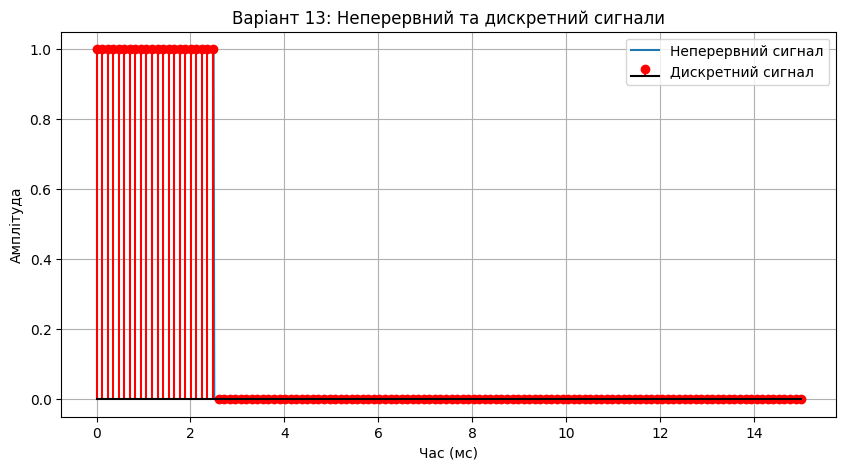

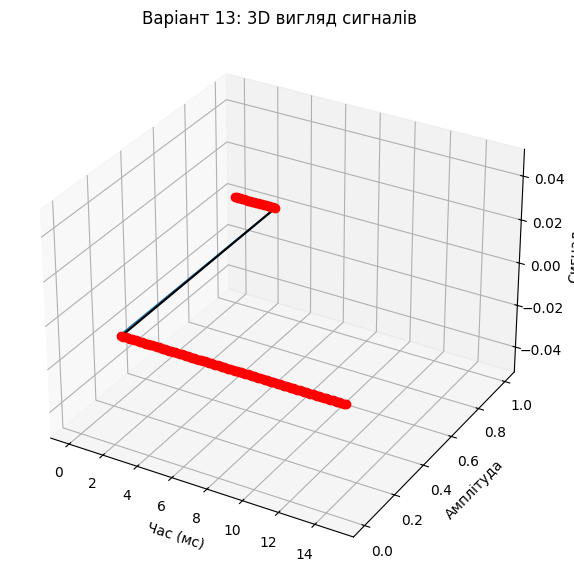

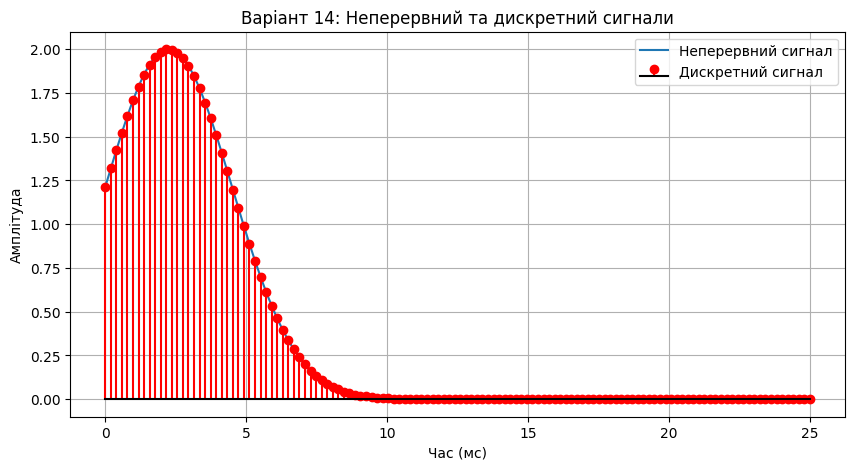

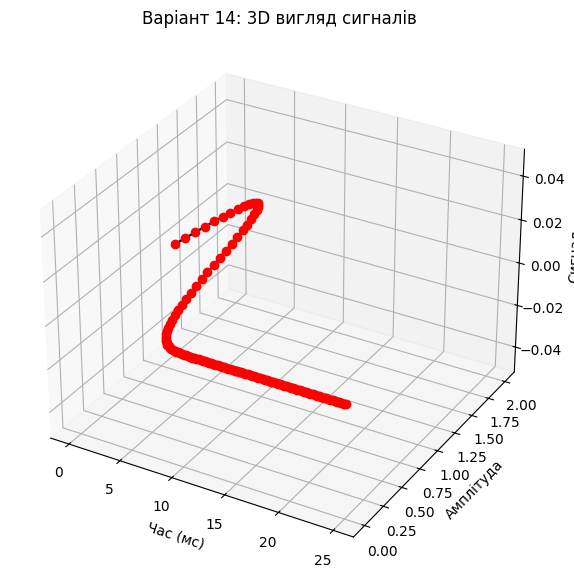

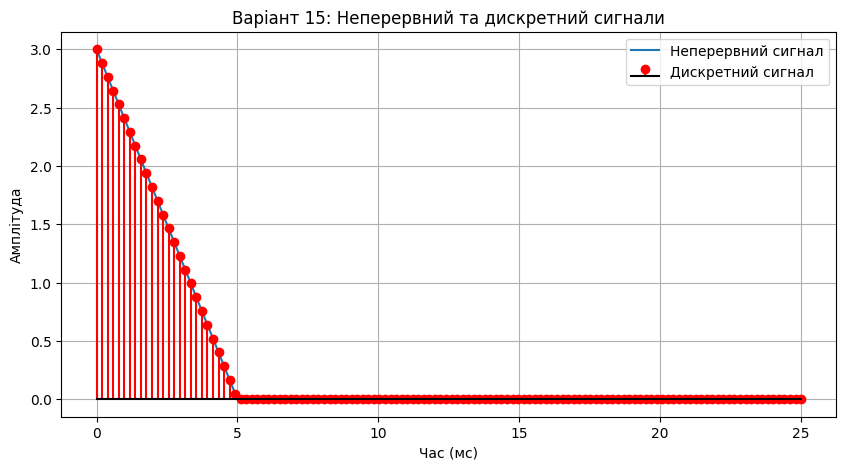

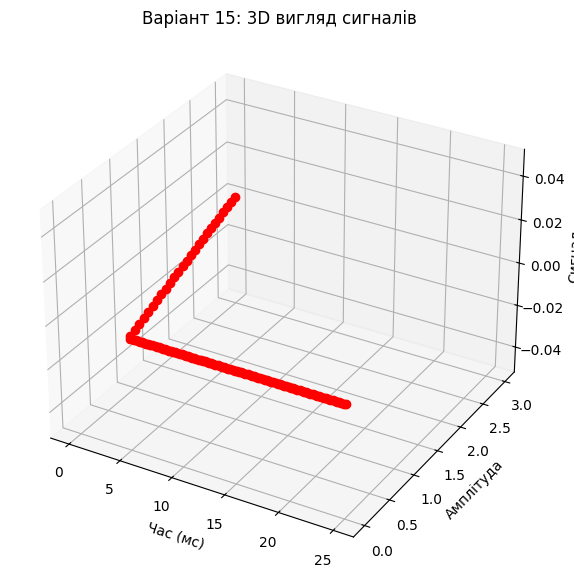

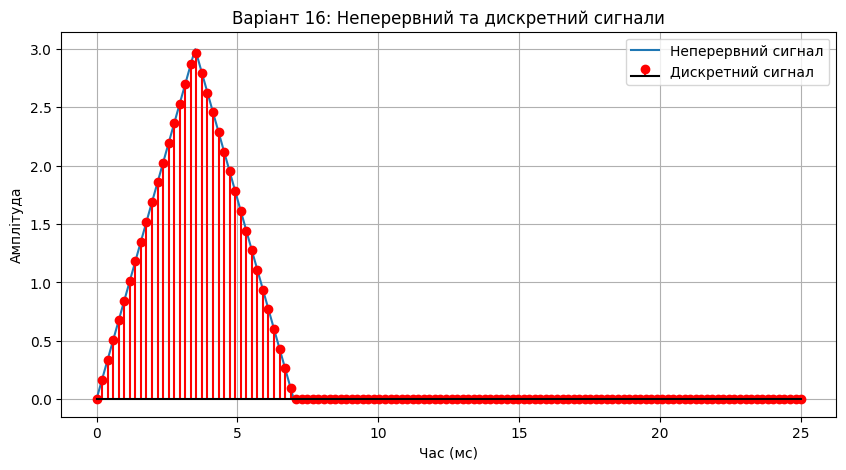

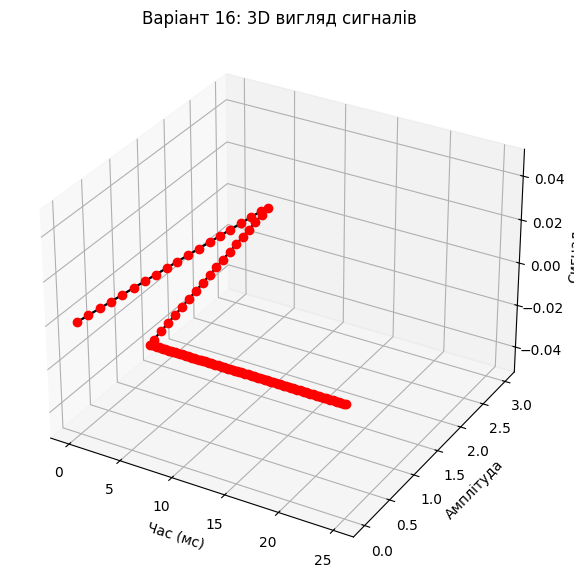

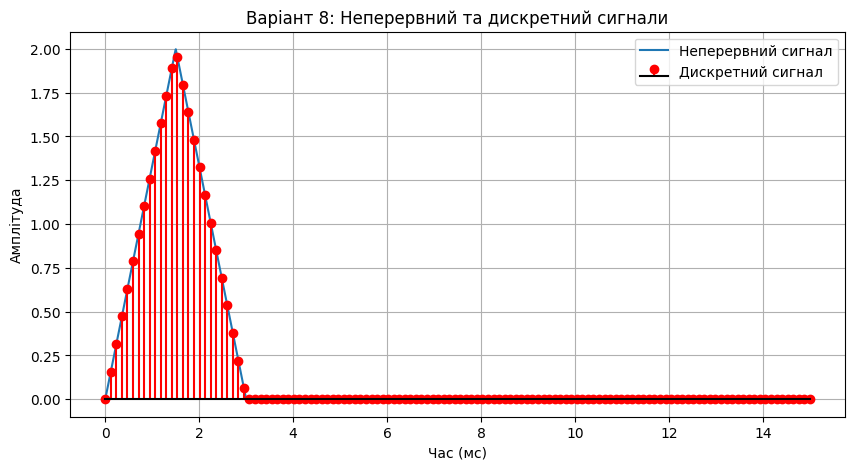

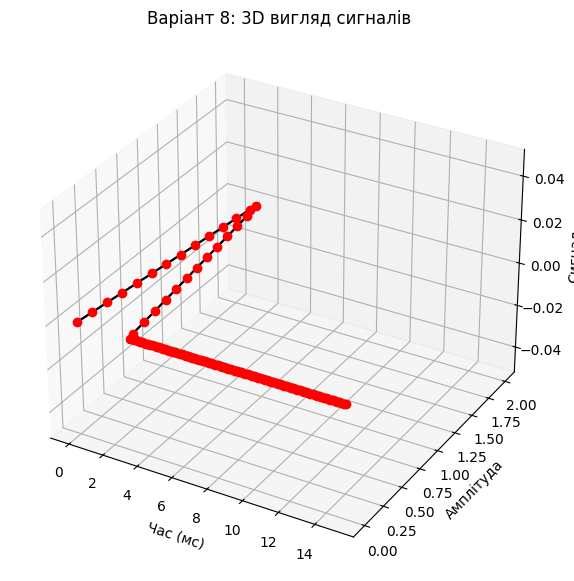

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from mpl_toolkits.mplot3d import Axes3D

N = 128  # Кількість відліків
t_continuous = np.linspace(0, 3 * 5e-3, 1000)  # Неперервний часовий масив для варіанту 13

variants = {
    13: {"type": "rectangular", "A": 1, "B": 2, "t_pulse": 5e-3, "interval": 3 * 5e-3},
    14: {"type": "gaussian", "A": 2, "B": 2, "t_pulse": 4.5e-3, "interval": 25e-3},
    15: {"type": "asymmetric_triangular", "A": 3, "B": 3, "t_pulse": 5e-3, "interval": 25e-3},
    16: {"type": "symmetric_triangular", "A": 3, "B": 3, "t_pulse": 7e-3, "interval": 25e-3},
    8: {"type": "symmetric_triangular", "A": 2, "B": 2, "t_pulse": 3e-3, "interval": 15e-3},
}

# Функція для генерації сигналу
def generate_signal(variant, t):
    A = variant["A"]
    B = variant["B"]
    t_pulse = variant["t_pulse"]
    
    if variant["type"] == "rectangular":
        return A * (np.abs(t) < t_pulse / 2)
    elif variant["type"] == "gaussian":
        return A * np.exp(-B * ((t - t_pulse / 2) ** 2) / (t_pulse ** 2))
    elif variant["type"] == "asymmetric_triangular":
        return A * (1 - np.abs(t) / (t_pulse)) * (np.abs(t) <= t_pulse)
    elif variant["type"] == "symmetric_triangular":
        return A * (1 - np.abs(t - t_pulse / 2) / (t_pulse / 2)) * (np.abs(t - t_pulse / 2) <= t_pulse / 2)

def plot_signal_2d_3d(variant_key):
    variant = variants[variant_key]
    t_continuous = np.linspace(0, variant["interval"], 1000)
    t_discrete = np.linspace(0, variant["interval"], N)
    signal_continuous = generate_signal(variant, t_continuous)
    signal_discrete = generate_signal(variant, t_discrete)
    
    # 2D графік
    plt.figure(figsize=(10, 5))
    plt.plot(t_continuous * 1e3, signal_continuous, label="Неперервний сигнал", linewidth=1.5)
    plt.stem(t_discrete * 1e3, signal_discrete, linefmt='r-', markerfmt='ro', basefmt='k-', label="Дискретний сигнал")
    plt.title(f"Варіант {variant_key}: Неперервний та дискретний сигнали")
    plt.xlabel("Час (мс)")
    plt.ylabel("Амплітуда")
    plt.grid(True)
    plt.legend()
    plt.show()
    
    # 3D графік
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(t_continuous * 1e3, signal_continuous, np.zeros_like(t_continuous), label='Неперервний сигнал')
    ax.stem(t_discrete * 1e3, signal_discrete, np.zeros_like(t_discrete), linefmt='r-', markerfmt='ro', basefmt='k-')
    ax.set_title(f"Варіант {variant_key}: 3D вигляд сигналів")
    ax.set_xlabel("Час (мс)")
    ax.set_ylabel("Амплітуда")
    ax.set_zlabel("Сигнал")
    plt.show()

for var in [13, 14, 15, 16, 8]:
    plot_signal_2d_3d(var)